<a href="https://colab.research.google.com/github/Athman-Athman/RESEARCH/blob/main/RESEARCH_DATA_ANALYSIS_VTT_NOV_24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

EDA

In [2]:
# Importing libraries and reloading the data
import pandas as pd

# Loading the dataset
file_path = './DATA_RESEARCH - Copy.xlsx'
data = pd.read_excel(file_path)

# Retrieving the number of rows and columns
rows, columns = data.shape

rows, columns


(3091, 81)

In [3]:
# Display the variables (column names) in Sheet1
for i, column in enumerate(data.columns, start=1):
    print(f"{i}. {column}")


1. SN
2. VESSEL
3. REFERENCE NUMBER
4. VOYAGE NUMBER
5. LOA
6. ROT
7. BERTH
8. DRAFT (ARRIVAL)
9. DRAFT (DEPARTURE)
10. LINE
11. SERVICE
12. DISCHARGED-(FULL/ FCL-20')
13. DISCHARGED-(FULL/ FCL-40')
14. DISCHARGED-(FULL/ LCL-20')
15. DISCHARGED-(FULL/ LCL-40')
16. DISCHARGED-(EMPTY-20')
17. DISCHARGED-(EMPTY-40')
18. DISCHARGED-(REEFER-20')
19. DISCHARGED-(REEFER-40')
20. DISCHARGED-(HAZARDOUS-20')
21. DISCHARGED-(HAZARDOUS-40')
22. DISCHARGED-(OUT OF GAUGE-20')
23. DISCHARGED-(OUT OF GAUGE-40')
24. DISCHARGED-(TRANS SHIPMENT-20')
25. DISCHARGED-(TRANS SHIPMENT-40')
26. DISCHARGED-(ON BOARD SHIFTING-20')
27. DISCHARGED-(ON BOARD SHIFTING-40')
28. DISCHARGED-(SHIFTING VIA QUAY-20')
29. DISCHARGED-(SHIFTING VIA QUAY-40')
30. LOADED-(FULL/ FCL-20')
31. LOADED-(FULL/ FCL-40')
32. LOADED-(FULL/ LCL-20')
33. LOADED-(FULL/ LCL-40')
34. LOADED-(EMPTY-20')
35. LOADED-(EMPTY-40')
36. LOADED-(REEFER-20')
37. LOADED-(REEFER-40')
38. LOADED-(HAZARDOUS-20')
39. LOADED-(HAZARDOUS-40')
40. LOADED-(OUT

CHAPTER 4
DATA-PRE PROCESSING

1. Data Cleaning and Handling Missing Values

In [4]:
!pip install ace_tools

In [5]:
# Identify missing data percentage for each column
missing_data = data.isnull().sum() / len(data) * 100
missing_data_df = pd.DataFrame({
    "Column": data.columns,
    "Missing Percentage": missing_data
}).sort_values(by="Missing Percentage", ascending=False)

# Display missing data details
missing_data_df.head(20)



,Column,Missing Percentage
MACHINE TYPE,MACHINE TYPE,48.398577
LOA,LOA,29.310903
DRAFT (DEPARTURE),DRAFT (DEPARTURE),4.432223
ROT,ROT,3.785183
DRAFT (ARRIVAL),DRAFT (ARRIVAL),1.035264
SERVICE,SERVICE,0.549984
LOADED-(FULL/ LCL-40'),LOADED-(FULL/ LCL-40'),0.517632
LOADED-(FULL/ LCL-20'),LOADED-(FULL/ LCL-20'),0.517632
AVGE MOVE /SW HR,AVGE MOVE /SW HR,0.388224
SHIP WORKING HOURS,SHIP WORKING HOURS,0.355872


In [6]:
# Implement the recommended actions on the dataset

# 1. Impute 'MACHINE TYPE' with mode (most frequent value)
if 'MACHINE TYPE' in data.columns:
    mode_value = data['MACHINE TYPE'].mode()[0]
    data['MACHINE TYPE'] = data['MACHINE TYPE'].fillna(mode_value)

# 2. Impute 'LOA' with the median
if 'LOA' in data.columns:
    data['LOA'] = pd.to_numeric(data['LOA'], errors='coerce')  # Ensure numeric conversion
    median_loa = data['LOA'].median()
    data['LOA'] = data['LOA'].fillna(median_loa)

# 3. Impute 'DRAFT (DEPARTURE)' with the median
if 'DRAFT (DEPARTURE)' in data.columns:
    data['DRAFT (DEPARTURE)'] = pd.to_numeric(data['DRAFT (DEPARTURE)'], errors='coerce')  # Ensure numeric conversion
    median_draft_departure = data['DRAFT (DEPARTURE)'].median()
    data['DRAFT (DEPARTURE)'] = data['DRAFT (DEPARTURE)'].fillna(median_draft_departure)

# 4. Drop 'ROT' since it was deemed not critical
if 'ROT' in data.columns:
    data = data.drop(columns=['ROT'])

# 5. Impute 'DRAFT (ARRIVAL)' with the median
if 'DRAFT (ARRIVAL)' in data.columns:
    data['DRAFT (ARRIVAL)'] = pd.to_numeric(data['DRAFT (ARRIVAL)'], errors='coerce')  # Ensure numeric conversion
    median_draft_arrival = data['DRAFT (ARRIVAL)'].median()
    data['DRAFT (ARRIVAL)'] = data['DRAFT (ARRIVAL)'].fillna(median_draft_arrival)

# Display the updated dataset information
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3091 entries, 0 to 3090
Data columns (total 80 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   SN                                  3091 non-null   int64         
 1   VESSEL                              3091 non-null   object        
 2   REFERENCE NUMBER                    3090 non-null   object        
 3   VOYAGE NUMBER                       3090 non-null   object        
 4   LOA                                 3091 non-null   float64       
 5   BERTH                               3091 non-null   float64       
 6   DRAFT (ARRIVAL)                     3091 non-null   float64       
 7   DRAFT (DEPARTURE)                   3091 non-null   float64       
 8   LINE                                3091 non-null   object        
 9   SERVICE                             3074 non-null   object        
 10  DISCHARGED-(FULL/ FCL-20

Standardize Features Types

In [7]:
import pandas as pd
import numpy as np
# Standardize the feature types in the dataset

# Convert columns with datetime information to pandas datetime
datetime_columns = ['ARRIVED BERTH', 'TIME/DATE SAILED', 'COMMENCE OPS',
                    'COMPL. OP','DROP PILOT']  # Adjust as needed
for col in datetime_columns:
    if col in data.columns:
        data[col] = pd.to_datetime(data[col], errors='coerce')

# Convert numeric columns to appropriate numeric types
numeric_columns = ['LOA','BERTH','DRAFT (ARRIVAL)','DRAFT (DEPARTURE)','TOTAL TEUs',
                   'PORT PRODUCTIVITY','BERTH PRODUCTIVITY','OPERATIONS PRODUCTIVITY']
for col in numeric_columns:
    if col in data.columns:
        data[col] = pd.to_numeric(data[col], errors='coerce')

# Replace 'o' with NaN and convert all to numeric
column_name = 'BERTH'  # Replace with your actual column name

# Replace 'o' with NaN
data[column_name] = data[column_name].replace('o', np.nan)

# Convert to numeric, coercing non-numeric values to NaN
data[column_name] = pd.to_numeric(data[column_name], errors='coerce')

# Convert categorical columns to string or category type
categorical_columns = ['MACHINE TYPE']  # Adjust as needed
for col in categorical_columns:
    if col in data.columns:
        data[col] = data[col].astype(str)

# Display the updated dataset info
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3091 entries, 0 to 3090
Data columns (total 80 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   SN                                  3091 non-null   int64         
 1   VESSEL                              3091 non-null   object        
 2   REFERENCE NUMBER                    3090 non-null   object        
 3   VOYAGE NUMBER                       3090 non-null   object        
 4   LOA                                 3091 non-null   float64       
 5   BERTH                               3091 non-null   float64       
 6   DRAFT (ARRIVAL)                     3091 non-null   float64       
 7   DRAFT (DEPARTURE)                   3091 non-null   float64       
 8   LINE                                3091 non-null   object        
 9   SERVICE                             3074 non-null   object        
 10  DISCHARGED-(FULL/ FCL-20

In [8]:
data[['ARRIVED O/A','ARRIVED BERTH','COMMENCE OPS','COMPL. OP']]

,ARRIVED O/A,ARRIVED BERTH,COMMENCE OPS,COMPL. OP
0,2011-12-24 05:42:00,2011-12-31 14:50:00,2011-12-31 16:00:00,2012-01-01 21:15:00
1,2011-12-28 14:48:00,2012-01-02 01:55:00,2012-01-02 03:00:00,2012-01-02 23:00:00
2,2011-12-22 07:42:00,2012-02-01 01:40:00,2012-01-02 02:30:00,2012-01-03 04:00:00
3,2011-12-21 10:20:00,2011-12-31 20:40:00,2011-12-31 22:50:00,2012-01-03 13:00:00
4,2011-12-24 12:00:00,2012-01-03 12:45:00,2012-01-03 14:15:00,2012-01-05 08:00:00
...,...,...,...,...
3086,2022-12-21 06:54:00,2022-12-27 12:40:00,2022-12-27 14:03:00,2022-12-28 04:55:00
3087,2022-12-16 11:18:00,2022-12-24 19:40:00,2022-12-24 21:07:00,2022-12-29 15:00:00
3088,2022-12-16 21:36:00,2022-12-27 02:35:00,2022-12-27 04:48:00,2022-12-30 19:00:00
3089,2022-12-23 10:38:00,2022-12-28 12:20:00,2022-12-28 20:34:00,2022-12-30 19:45:00


In [9]:
# Retrieving the number of rows and columns
rows, columns = data.shape

rows, columns

(3091, 80)

2. Understanding Feature Distributions

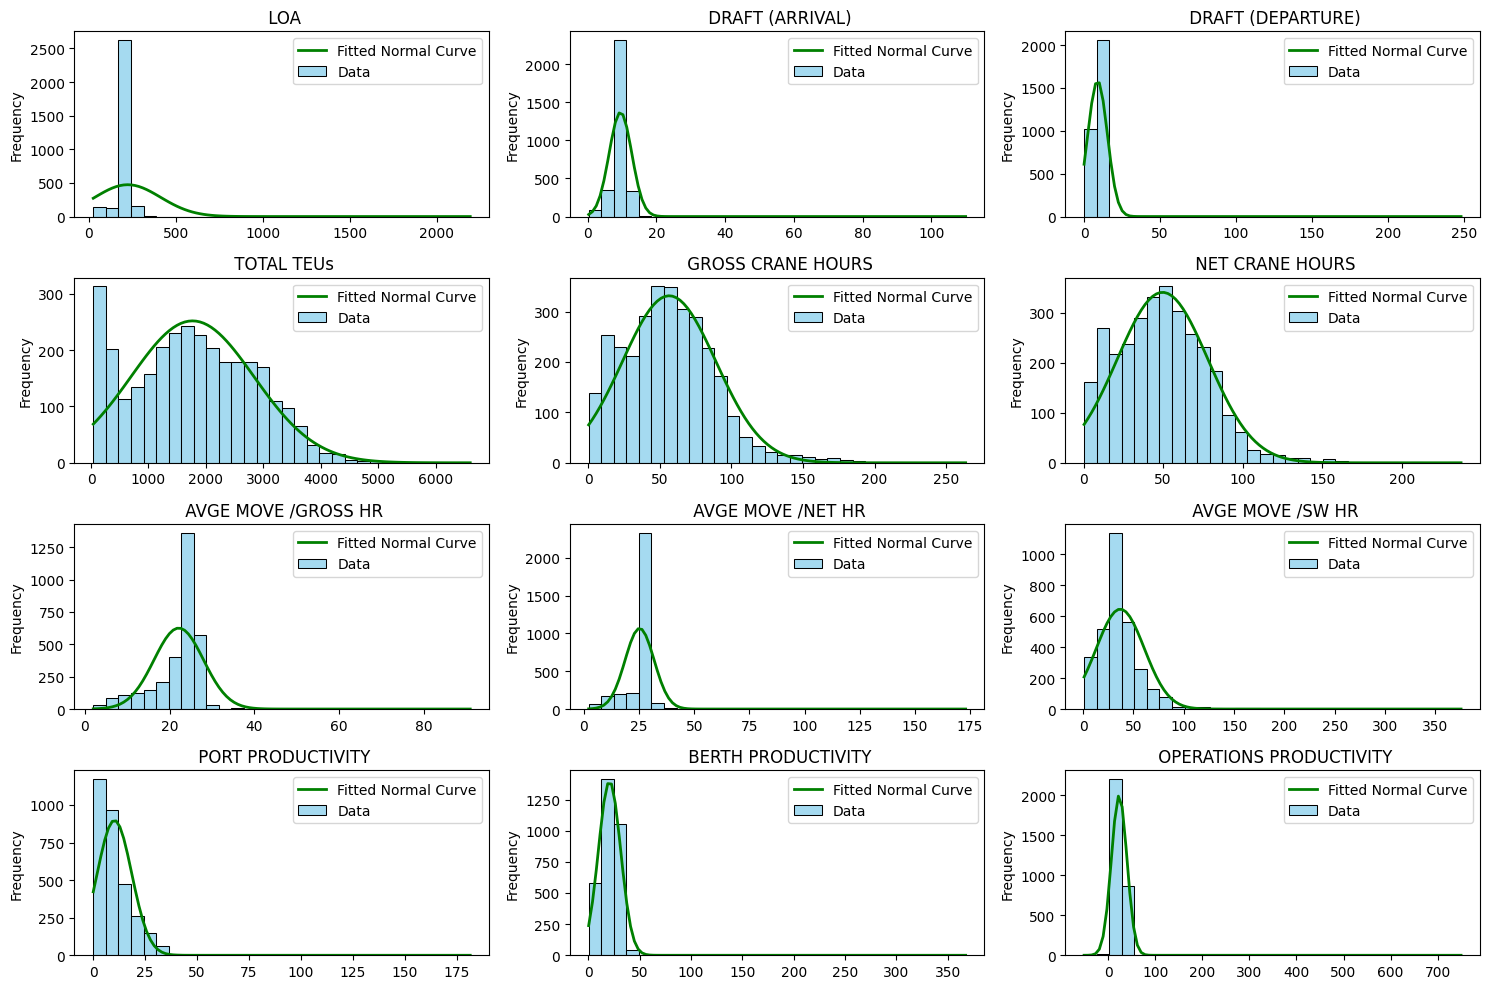

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# List of numeric features to visualize
numeric_features = ['LOA','DRAFT (ARRIVAL)','DRAFT (DEPARTURE)','TOTAL TEUs',
                    'GROSS CRANE HOURS','NET CRANE HOURS','AVGE MOVE /GROSS HR',
                    'AVGE MOVE /NET HR','AVGE MOVE /SW HR','PORT PRODUCTIVITY',
                    'BERTH PRODUCTIVITY','OPERATIONS PRODUCTIVITY']

# Set up the figure for subplots
plt.figure(figsize=(15, 10))

# Loop through features and create a subplot for each
for i, feature in enumerate(numeric_features, 1):
    if feature in data.columns:
        plt.subplot(4, 3, i)  # Adjust rows/columns as needed

        # Plot histogram
        sns.histplot(data[feature], kde=False, bins=30, color='skyblue', edgecolor='black', label='Data')

        # Fit and overlay a normal distribution
        mean, std = data[feature].mean(), data[feature].std()
        x = np.linspace(data[feature].min(), data[feature].max(), 100)
        plt.plot(x, norm.pdf(x, mean, std) * len(data[feature]) * (data[feature].max() - data[feature].min()) / 30,
                 color='green', lw=2, label='Fitted Normal Curve')

        plt.title(f" {feature}")
        plt.xlabel("")
        plt.ylabel("Frequency")
        plt.legend()

plt.tight_layout()
plt.show()


3. Detecting and Handling Outliers

In [11]:
# Outlier Analysis using IQR
import pandas as pd

outlier_summary = {}
key_features = ['LOA','DRAFT (ARRIVAL)','DRAFT (DEPARTURE)','TOTAL TEUs',
                'GROSS CRANE HOURS','NET CRANE HOURS','AVGE MOVE /GROSS HR',
                'AVGE MOVE /NET HR','AVGE MOVE /SW HR','PORT PRODUCTIVITY',
                'BERTH PRODUCTIVITY','OPERATIONS PRODUCTIVITY']

for feature in key_features:
    if feature in data.columns:
        # Calculate IQR
        Q1 = data[feature].quantile(0.25)
        Q3 = data[feature].quantile(0.75)
        IQR = Q3 - Q1

        # Define lower and upper bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identify outliers
        outliers = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)]
        outlier_summary[feature] = {
            "Total Outliers": len(outliers),
            "Lower Bound": lower_bound,
            "Upper Bound": upper_bound,
            "Percentage of Outliers": len(outliers) / len(data) * 100
        }

# Convert summary to DataFrame
outlier_summary = pd.DataFrame.from_dict(outlier_summary, orient='index')

# Display the outlier analysis summary
from IPython.display import display

# Display outlier summary DataFrame in a tabular format
display(outlier_summary)



,Total Outliers,Lower Bound,Upper Bound,Percentage of Outliers
LOA,613,192.000000,232.000000,19.831770
DRAFT (ARRIVAL),288,5.900000,13.900000,9.317373
DRAFT (DEPARTURE),182,5.750000,11.750000,5.888062
TOTAL TEUs,6,-1554.250000,5055.750000,0.194112
GROSS CRANE HOURS,61,-31.372500,140.607500,1.973471
NET CRANE HOURS,40,-30.095000,127.065000,1.294080
AVGE MOVE /GROSS HR,314,12.619403,33.406121,10.158525
AVGE MOVE /NET HR,585,21.772661,31.574990,18.925914
AVGE MOVE /SW HR,198,-2.290230,69.863961,6.405694
PORT PRODUCTIVITY,115,-9.287366,27.786971,3.720479


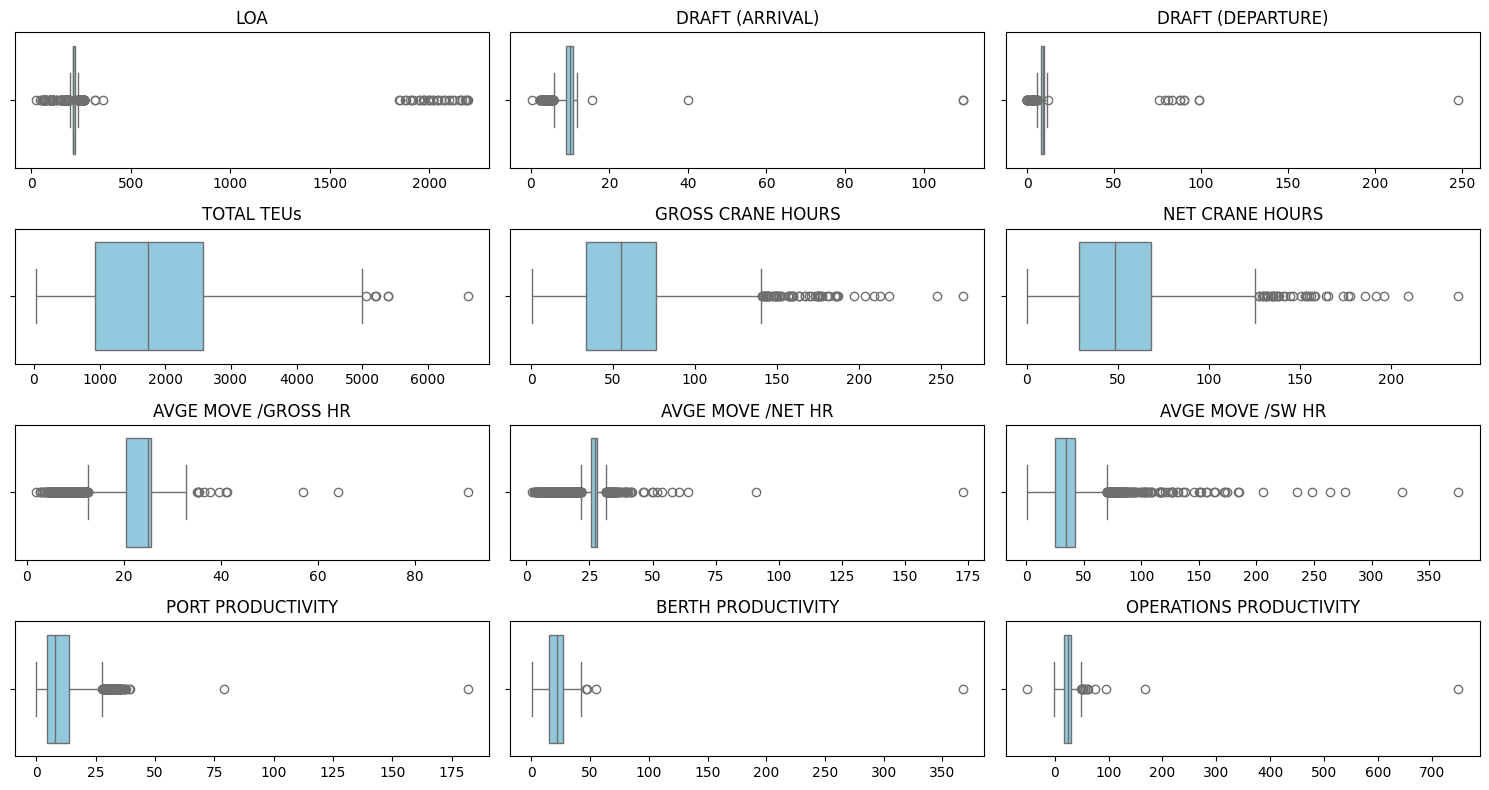

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure for subplots
plt.figure(figsize=(15, 8))

# Loop through features and create a subplot for each
for i, feature in enumerate(key_features, 1):
    if feature in data.columns:
        plt.subplot(4, 3, i)  # Adjust rows/columns as needed
        sns.boxplot(x=data[feature], color='skyblue')
        plt.title(f"{feature}")
        plt.xlabel("")  # Remove x-labels
plt.tight_layout()
plt.show()


Save the dataset as cleaned

In [13]:
# Save the cleaned dataset to a new Excel file
data.to_excel("CLEANED_DATASET.xlsx", index=False)
print("Cleaned dataset saved as 'CLEANED_DATASET.xlsx'")


Cleaned dataset saved as 'CLEANED_DATASET.xlsx'


In [14]:
# Loading the dataset
file_path = './CLEANED_DATASET.xlsx'
df = pd.read_excel(file_path)

Transform outliers

In [15]:
# Transform outliers using a log transformation to reduce skewness

# Apply log transformation to features with outliers
for feature in key_features:
    if feature in df.columns:
        # Add a small constant to avoid log(0)
        df[feature] = np.log1p(df[feature])

# Verify the transformations by showing the updated summary statistics
df[key_features].describe()


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


,LOA,DRAFT (ARRIVAL),DRAFT (DEPARTURE),TOTAL TEUs,GROSS CRANE HOURS,NET CRANE HOURS,AVGE MOVE /GROSS HR,AVGE MOVE /NET HR,AVGE MOVE /SW HR,PORT PRODUCTIVITY,BERTH PRODUCTIVITY,OPERATIONS PRODUCTIVITY
count,3091.000000,3091.000000,3091.000000,3091.000000,3091.000000,3091.000000,3091.000000,3091.000000,3079.000000,3091.000000,3090.000000,3090.000000
mean,5.326637,2.325984,2.242876,7.159524,3.847799,3.715871,3.097307,3.227366,3.461446,2.181363,2.949008,3.069062
std,0.329381,0.252061,0.284153,0.967848,0.717701,0.728129,0.341587,0.316471,0.631843,0.718373,0.572347,0.542378
min,3.258097,0.262364,0.000000,3.663562,0.285179,0.285179,1.105646,1.150494,0.646952,0.056303,0.337773,-2.965193
25%,5.337538,2.292535,2.197225,6.830333,3.529884,3.395850,3.064065,3.275201,3.249117,1.725532,2.755915,2.869339
50%,5.351858,2.406945,2.282382,7.463363,4.021415,3.901771,3.255816,3.332627,3.569698,2.191695,3.116802,3.211456
75%,5.384495,2.476538,2.351375,7.854769,4.345298,4.235989,3.281328,3.363811,3.779774,2.700293,3.334219,3.420035
max,7.693026,4.709530,5.517453,8.795582,5.578181,5.472985,4.520800,5.158900,5.930804,5.207298,5.909169,6.621134


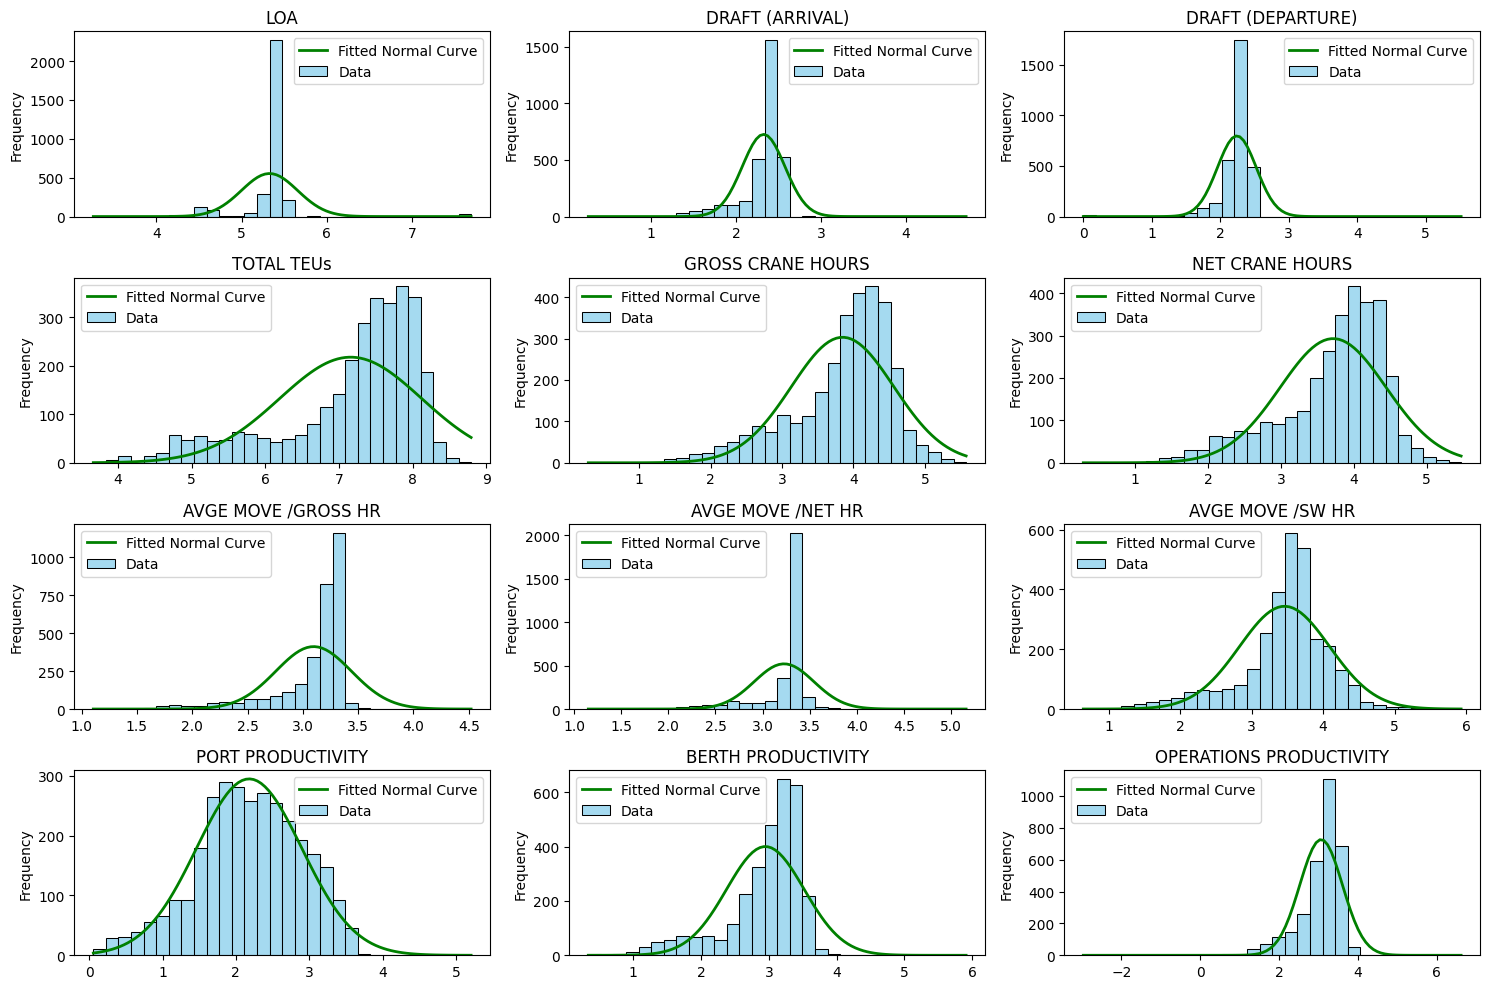

In [16]:
# Visualize transformed distributions
# Set up the figure for subplots
plt.figure(figsize=(15, 10))

# Loop through features and create a subplot for each
for i, feature in enumerate(numeric_features, 1):
    if feature in df.columns:
        plt.subplot(4, 3, i)  # Adjust rows/columns as needed

        # Plot histogram
        sns.histplot(df[feature], kde=False, bins=30, color='skyblue', edgecolor='black', label='Data')

        # Fit and overlay a normal distribution
        mean, std = df[feature].mean(), df[feature].std()
        x = np.linspace(df[feature].min(), df[feature].max(), 100)
        plt.plot(x, norm.pdf(x, mean, std) * len(df[feature]) * (df[feature].max() - df[feature].min()) / 30,
                 color='green', lw=2, label='Fitted Normal Curve')

        plt.title(f"{feature}")
        plt.xlabel("")
        plt.ylabel("Frequency")
        plt.legend()

plt.tight_layout()
plt.show()


Feature Engineering

Creation of new Features

In [17]:
# Create new feature
# Convert columns with datetime information to pandas datetime
datetime_columns = ['ARRIVED BERTH', 'TIME/DATE SAILED', 'COMMENCE OPS',
                    'COMPL. OP','DROP PILOT']  # Adjust as needed
for col in datetime_columns:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors='coerce')

# Calculate the new variables
df['WAITING_TIME_TO_DOCK'] = df['ARRIVED BERTH'] - df['ARRIVED O/A']
df['WAITING_OPERATIONS'] = df['COMMENCE OPS'] - df['ARRIVED BERTH']
df['OPERATION_TIME'] = df['COMPL. OP'] - df['COMMENCE OPS']
df['UNLOADING_TIME'] = df['TIME/DATE SAILED'] - df['COMPL. OP']
df['TURN_AROUND_TIME'] = df['DROP PILOT'] - df['ARRIVED O/A']

# Covert the new variables to days
df['WAITING_TIME_TO_DOCK'] = df['WAITING_TIME_TO_DOCK'].dt.days
df['WAITING_OPERATIONS'] = df['WAITING_OPERATIONS'].dt.days
df['OPERATION_TIME'] = df['OPERATION_TIME'].dt.days
df['UNLOADING_TIME'] = df['UNLOADING_TIME'].dt.days
df['TURN_AROUND_TIME'] = df['TURN_AROUND_TIME'].dt.days

# Display the updated dataset with the new variables
df.head()

,SN,VESSEL,REFERENCE NUMBER,VOYAGE NUMBER,LOA,BERTH,DRAFT (ARRIVAL),DRAFT (DEPARTURE),LINE,SERVICE,...,AVGE MOVE /SW HR,PORT PRODUCTIVITY,BERTH PRODUCTIVITY,OPERATIONS PRODUCTIVITY,MACHINE TYPE,WAITING_TIME_TO_DOCK,WAITING_OPERATIONS,OPERATION_TIME,UNLOADING_TIME,TURN_AROUND_TIME
0,1,WEHR WARNOW,MSKC/WEHRWAR/1201,1201,5.351858,9.0,2.151762,2.272126,MSK,28J,...,3.281100,1.256319,2.851791,2.948927,SSG,7,0,1,0.0,8
1,2,ROYAL ZANZIBAR,MSCC/ROYZAN/1007R,1007R,5.351858,10.0,1.435085,1.704748,MSC,FEEDAR,...,2.234352,0.557329,1.651549,1.774952,SC,4,0,0,0.0,5
2,3,MANTENHA,MSCC/MVMANT/160R,160R,5.351858,9.0,1.481605,1.704748,MSC,FEEDAR,...,2.215203,0.297777,1.457848,1.593627,SC,40,-30,1,0.0,12
3,4,PARDIS,HDSC/PARDIS/SAS0017,SAS0017,5.351858,11.0,2.517696,2.370244,HDSC,AMET,...,3.210872,1.532657,2.903195,2.975283,SSG,10,0,2,0.0,13
4,5,MSC JASMINE,MSCC/MSCJAS/52R,52R,5.351858,9.0,2.501436,2.397895,MSC,DAR,...,3.442847,1.399683,3.005250,3.092402,SSG,10,0,1,0.0,11


In [18]:
# Filter the dataset to show rows where any of the new variables have negative values
negative_values = df[
    (df['WAITING_TIME_TO_DOCK'] < 0) |
    (df['WAITING_OPERATIONS'] < 0)|
    (df['OPERATION_TIME'] < 0)|
    (df['UNLOADING_TIME'] < 0) |
    (df['TURN_AROUND_TIME'] < 0)
]
negative_values[['WAITING_TIME_TO_DOCK','WAITING_OPERATIONS','OPERATION_TIME',
                 'UNLOADING_TIME','TURN_AROUND_TIME']]


,WAITING_TIME_TO_DOCK,WAITING_OPERATIONS,OPERATION_TIME,UNLOADING_TIME,TURN_AROUND_TIME
2,40,-30,1,0.0,12
207,10,0,4,0.0,-15658
213,5,0,4,0.0,-15669
263,0,0,2,0.0,-15741
345,1,1,-1,0.0,2
469,2,-1,2,0.0,5
488,3,-1,2,0.0,6
568,5,0,1,0.0,-16077
628,-18,18,2,0.0,3
638,2,0,1,0.0,-16160


In [19]:
# Count the number of rows with negative values for each of the new variables
negative_counts = {
    'WAITING_TIME_TO_DOCK': (df['WAITING_TIME_TO_DOCK'] < 0).sum(),
    'WAITING_OPERATIONS': (df['WAITING_OPERATIONS'] < 0).sum(),
    'OPERATION_TIME': (df['OPERATION_TIME'] < 0).sum(),
    'UNLOADING_TIME': (df['UNLOADING_TIME'] < 0).sum(),
    'TURN_AROUND_TIME': (df['TURN_AROUND_TIME'] < 0).sum()
}
negative_counts

{'WAITING_TIME_TO_DOCK': 1,
 'WAITING_OPERATIONS': 4,
 'OPERATION_TIME': 2,
 'UNLOADING_TIME': 0,
 'TURN_AROUND_TIME': 28}

In [20]:
# Drop rows with negative values in any of the newly created variables
DATA_NEW_VARIABLES = df[
    (df['WAITING_TIME_TO_DOCK'] >= 0) &
    (df['WAITING_OPERATIONS'] >= 0) &
    (df['OPERATION_TIME'] >= 0) &
    (df['UNLOADING_TIME'] >= 0)&
    (df['TURN_AROUND_TIME'] >= 0)
]

# Display the shape of the dataset after dropping rows
DATA_NEW_VARIABLES.shape

(3055, 85)

Conduct EDA for new Variables

<ipython-input-21-4d25bb90eca0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DATA_NEW_VARIABLES[col] = pd.to_numeric(DATA_NEW_VARIABLES[col], errors='coerce')


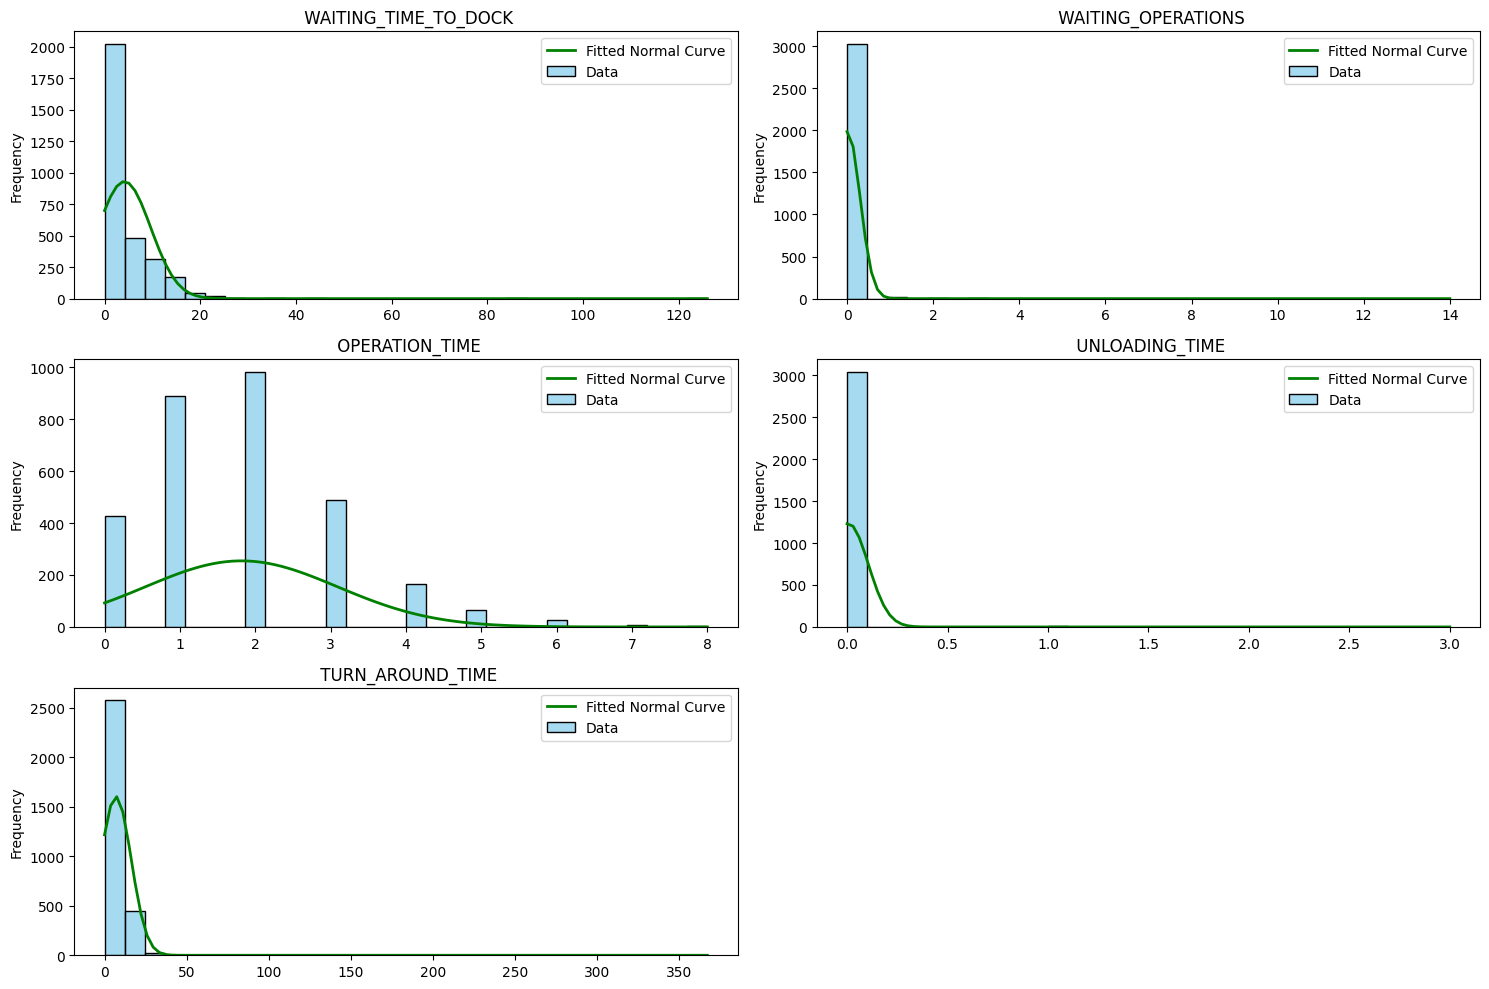

In [21]:
# Convert numeric columns to appropriate numeric types
new_variables = ['WAITING_TIME_TO_DOCK','WAITING_OPERATIONS','OPERATION_TIME','UNLOADING_TIME',
                   'TURN_AROUND_TIME']
for col in new_variables:
    if col in DATA_NEW_VARIABLES.columns:
        DATA_NEW_VARIABLES[col] = pd.to_numeric(DATA_NEW_VARIABLES[col], errors='coerce')

# Set up the figure for subplots
plt.figure(figsize=(15, 10))

# Loop through features and create a subplot for each
for i, feature in enumerate(new_variables, 1):
    if feature in DATA_NEW_VARIABLES.columns:
        plt.subplot(3, 2, i)  # Adjust rows/columns as needed

        # Plot histogram
        sns.histplot(DATA_NEW_VARIABLES[feature], kde=False, bins=30, color='skyblue', edgecolor='black', label='Data')

        # Fit and overlay a normal distribution
        mean, std = DATA_NEW_VARIABLES[feature].mean(), DATA_NEW_VARIABLES[feature].std()
        x = np.linspace(DATA_NEW_VARIABLES[feature].min(), DATA_NEW_VARIABLES[feature].max(), 100)
        plt.plot(x, norm.pdf(x, mean, std) * len(DATA_NEW_VARIABLES[feature]) * (DATA_NEW_VARIABLES[feature].max() - DATA_NEW_VARIABLES[feature].min()) / 30,
                 color='green', lw=2, label='Fitted Normal Curve')

        plt.title(f" {feature}")
        plt.xlabel("")
        plt.ylabel("Frequency")
        plt.legend()

plt.tight_layout()
plt.show()


transform outliers

In [22]:
# Transform outliers using a log transformation to reduce skewness

# Apply log transformation to features with outliers
for feature in new_variables:
    if feature in DATA_NEW_VARIABLES.columns:
        # Add a small constant to avoid log(0)
        DATA_NEW_VARIABLES[feature] = np.log1p(DATA_NEW_VARIABLES[feature])

# Verify the transformations by showing the updated summary statistics
DATA_NEW_VARIABLES[new_variables].describe()

<ipython-input-22-0b1a0c3ed624>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DATA_NEW_VARIABLES[feature] = np.log1p(DATA_NEW_VARIABLES[feature])


,WAITING_TIME_TO_DOCK,WAITING_OPERATIONS,OPERATION_TIME,UNLOADING_TIME,TURN_AROUND_TIME
count,3055.000000,3055.000000,3055.000000,3055.000000,3055.000000
mean,1.192892,0.007997,0.926949,0.004671,1.795042
std,0.956660,0.092089,0.484490,0.060639,0.723423
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.693147,0.000000,1.386294
50%,1.098612,0.000000,1.098612,0.000000,1.791759
75%,2.079442,0.000000,1.098612,0.000000,2.397895
max,4.844187,2.708050,2.197225,1.386294,5.908083


In [23]:
DATA_NEW_VARIABLES['TURN_AROUND_TIME']

,TURN_AROUND_TIME
0,2.197225
1,1.791759
3,2.639057
4,2.484907
5,2.639057
...,...
3086,2.079442
3087,2.639057
3088,2.639057
3089,2.079442


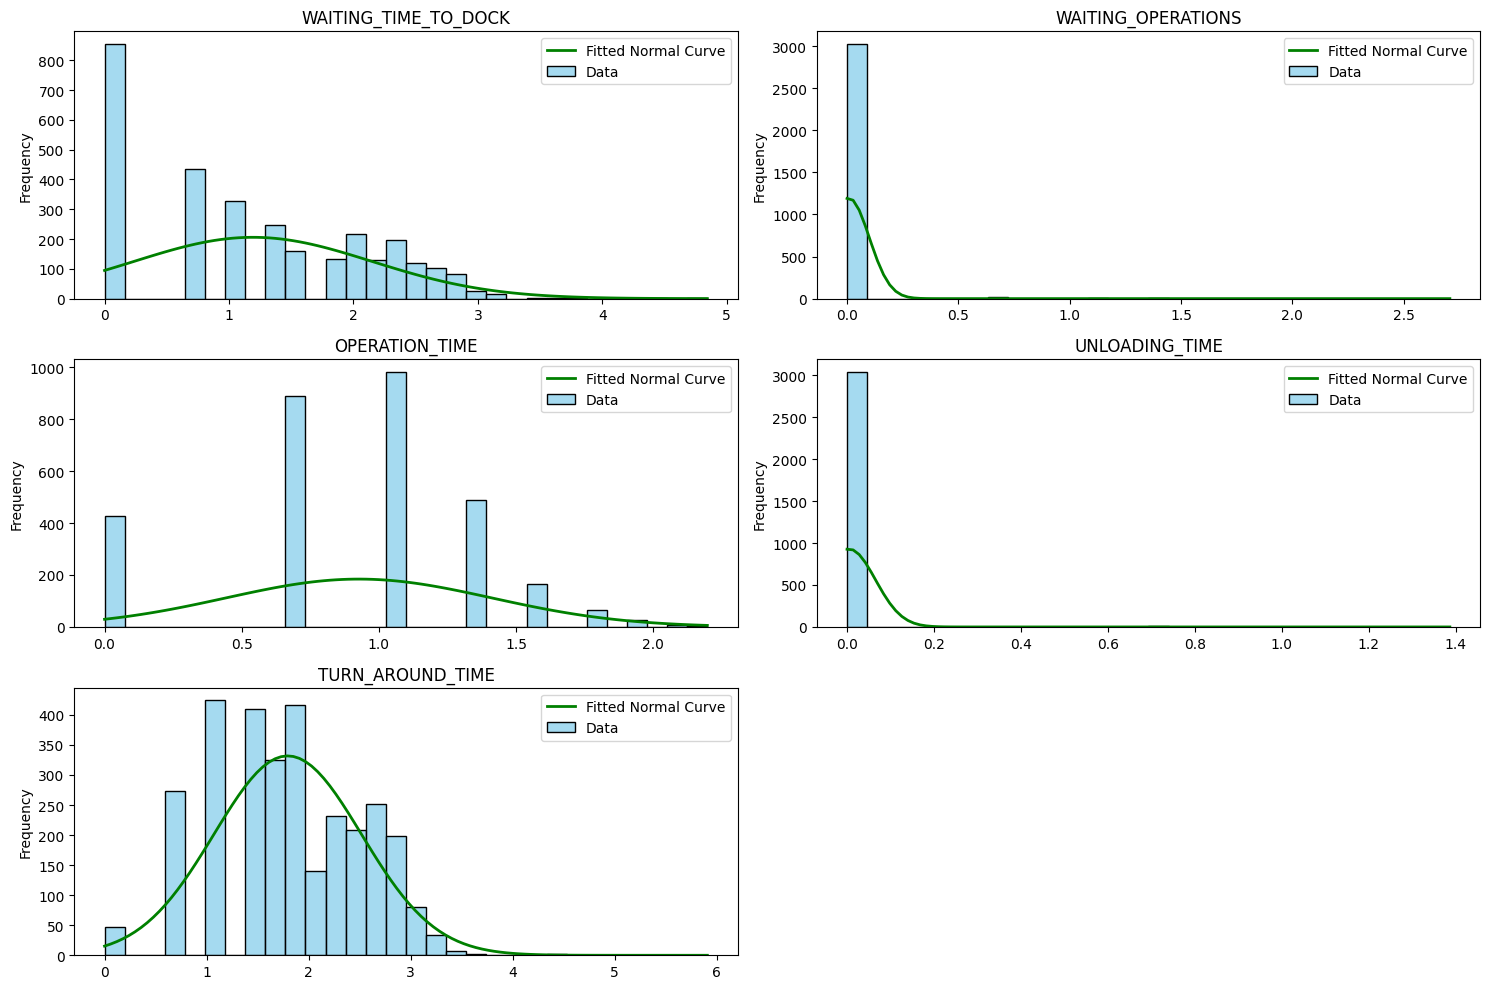

In [24]:
# Visualize transformed distributions
# Set up the figure for subplots
plt.figure(figsize=(15, 10))

# Loop through features and create a subplot for each
for i, feature in enumerate(new_variables, 1):
    if feature in DATA_NEW_VARIABLES.columns:
        plt.subplot(3, 2, i)  # Adjust rows/columns as needed

        # Plot histogram
        sns.histplot(DATA_NEW_VARIABLES[feature], kde=False, bins=30, color='skyblue', edgecolor='black', label='Data')

        # Fit and overlay a normal distribution
        mean, std = DATA_NEW_VARIABLES[feature].mean(), DATA_NEW_VARIABLES[feature].std()
        x = np.linspace(DATA_NEW_VARIABLES[feature].min(), DATA_NEW_VARIABLES[feature].max(), 100)
        plt.plot(x, norm.pdf(x, mean, std) * len(DATA_NEW_VARIABLES[feature]) * (DATA_NEW_VARIABLES[feature].max() - DATA_NEW_VARIABLES[feature].min()) / 30,
                 color='green', lw=2, label='Fitted Normal Curve')

        plt.title(f"{feature}")
        plt.xlabel("")
        plt.ylabel("Frequency")
        plt.legend()

plt.tight_layout()
plt.show()

Categorical Feature Encoding

In [25]:
# Clean and standardize 'MACHINE TYPE' column
if 'MACHINE TYPE' in DATA_NEW_VARIABLES.columns:
    # Ensure the column is treated as strings and strip whitespace
    DATA_NEW_VARIABLES['MACHINE TYPE'] = DATA_NEW_VARIABLES['MACHINE TYPE'].astype(str).str.strip()

    # Define a mapping for replacements
    replacements = {
        'SS': 'SC',
        'SGG': 'SSG',
        'SCG': 'SSG'
    }

    # Apply the replacements
    DATA_NEW_VARIABLES['MACHINE TYPE'] = DATA_NEW_VARIABLES['MACHINE TYPE'].replace(replacements)

# Output the unique value counts to verify cleaning
print("Unique values in 'MACHINE TYPE' after cleaning:")
print(DATA_NEW_VARIABLES['MACHINE TYPE'].value_counts())


Unique values in 'MACHINE TYPE' after cleaning:
MACHINE TYPE
SSG    2922
SC      133
Name: count, dtype: int64


<ipython-input-25-2b27070ec34a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DATA_NEW_VARIABLES['MACHINE TYPE'] = DATA_NEW_VARIABLES['MACHINE TYPE'].astype(str).str.strip()
<ipython-input-25-2b27070ec34a>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DATA_NEW_VARIABLES['MACHINE TYPE'] = DATA_NEW_VARIABLES['MACHINE TYPE'].replace(replacements)


In [26]:
# Clean 'MACHINE TYPE' column
if 'MACHINE TYPE' in DATA_NEW_VARIABLES.columns:
    # Strip whitespace
    DATA_NEW_VARIABLES['MACHINE TYPE'] = DATA_NEW_VARIABLES['MACHINE TYPE'].str.strip()

    # Replace inconsistent values
    DATA_NEW_VARIABLES['MACHINE TYPE'] = DATA_NEW_VARIABLES['MACHINE TYPE'].replace('SS', 'SC')
    DATA_NEW_VARIABLES['MACHINE TYPE'] = DATA_NEW_VARIABLES['MACHINE TYPE'].replace('SGG', 'SSG')
    DATA_NEW_VARIABLES['MACHINE TYPE'] = DATA_NEW_VARIABLES['MACHINE TYPE'].replace('SCG', 'SSG')

# Check the unique values after cleaning
print(DATA_NEW_VARIABLES['MACHINE TYPE'].value_counts())


MACHINE TYPE
SSG    2922
SC      133
Name: count, dtype: int64


<ipython-input-26-64eb96112a39>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DATA_NEW_VARIABLES['MACHINE TYPE'] = DATA_NEW_VARIABLES['MACHINE TYPE'].str.strip()
<ipython-input-26-64eb96112a39>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DATA_NEW_VARIABLES['MACHINE TYPE'] = DATA_NEW_VARIABLES['MACHINE TYPE'].replace('SS', 'SC')
<ipython-input-26-64eb96112a39>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

In [27]:
from sklearn.preprocessing import LabelEncoder

# Convert 'MACHINE TYPE' to numeric values
if 'MACHINE TYPE' in DATA_NEW_VARIABLES.columns:
    label_encoder = LabelEncoder()
    DATA_NEW_VARIABLES['MACHINE_TYPE_NUMERIC'] = label_encoder.fit_transform(DATA_NEW_VARIABLES['MACHINE TYPE'])

# Display the mapping for reference
machine_type_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(machine_type_mapping)

{'SC': 0, 'SSG': 1}


<ipython-input-27-f619533df5d7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DATA_NEW_VARIABLES['MACHINE_TYPE_NUMERIC'] = label_encoder.fit_transform(DATA_NEW_VARIABLES['MACHINE TYPE'])


SAVE THE FINAL DATASET FOR DEVELOPMENT OF THE MODEL

In [28]:
# Save the cleaned dataset to a new Excel file
DATA_NEW_VARIABLES.to_excel("CLEANED_FINAL_DATASET.xlsx", index=False)
print("Cleaned Final Dataset saved as 'CLEANED_FINAL_DATASET.xlsx'")

Cleaned Final Dataset saved as 'CLEANED_FINAL_DATASET.xlsx'


In [29]:
# Loading the dataset
file_path = './CLEANED_FINAL_DATASET.xlsx'
fd = pd.read_excel(file_path)
fd.describe()

,SN,LOA,BERTH,DRAFT (ARRIVAL),DRAFT (DEPARTURE),DISCHARGED-(FULL/ FCL-20'),DISCHARGED-(FULL/ FCL-40'),DISCHARGED-(FULL/ LCL-20'),DISCHARGED-(FULL/ LCL-40'),DISCHARGED-(EMPTY-20'),...,AVGE MOVE /SW HR,PORT PRODUCTIVITY,BERTH PRODUCTIVITY,OPERATIONS PRODUCTIVITY,WAITING_TIME_TO_DOCK,WAITING_OPERATIONS,OPERATION_TIME,UNLOADING_TIME,TURN_AROUND_TIME,MACHINE_TYPE_NUMERIC
count,3055.000000,3055.000000,3055.000000,3055.000000,3055.000000,3055.000000,3054.000000,3055.000000,3054.000000,3054.00000,...,3043.000000,3055.000000,3055.000000,3055.000000,3055.000000,3055.000000,3055.000000,3055.000000,3055.000000,3055.000000
mean,1551.029133,5.326221,9.602815,2.326622,2.243081,292.498200,243.787164,29.565303,4.789456,6.68664,...,3.462832,2.181959,2.950075,3.071499,1.192892,0.007997,0.926949,0.004671,1.795042,0.956465
min,1.000000,3.258097,0.000000,0.262364,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.646952,0.056303,0.337773,0.550529,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,777.500000,5.337538,9.000000,2.292535,2.197225,165.000000,93.000000,0.000000,0.000000,0.00000,...,3.249117,1.725532,2.755923,2.869749,0.000000,0.000000,0.693147,0.000000,1.386294,1.000000
50%,1554.000000,5.351858,9.000000,2.406945,2.282382,287.000000,223.000000,10.000000,2.000000,0.00000,...,3.569832,2.191695,3.117632,3.211514,1.098612,0.000000,1.098612,0.000000,1.791759,1.000000
75%,2324.500000,5.384495,11.000000,2.476538,2.351375,418.000000,382.000000,41.000000,7.000000,0.00000,...,3.781847,2.700293,3.334122,3.419800,2.079442,0.000000,1.098612,0.000000,2.397895,1.000000
max,3091.000000,7.693026,11.000000,4.709530,5.517453,995.000000,1076.000000,645.000000,61.000000,905.00000,...,5.930804,5.207298,5.909169,6.621134,4.844187,2.708050,2.197225,1.386294,5.908083,1.000000
std,893.409943,0.328167,1.186344,0.252299,0.285335,187.427436,188.796615,48.813515,7.211821,42.19564,...,0.632399,0.717640,0.570522,0.530502,0.956660,0.092089,0.484490,0.060639,0.723423,0.204092


FEATURE SELECTION

In [41]:
# Display the variables (column names) in Sheet1
for i, column in enumerate(fd.columns, start=1):
    print(f"{i}. {column}")

1. SN
2. VESSEL
3. REFERENCE NUMBER
4. VOYAGE NUMBER
5. LOA
6. BERTH
7. DRAFT (ARRIVAL)
8. DRAFT (DEPARTURE)
9. LINE
10. SERVICE
11. DISCHARGED-(FULL/ FCL-20')
12. DISCHARGED-(FULL/ FCL-40')
13. DISCHARGED-(FULL/ LCL-20')
14. DISCHARGED-(FULL/ LCL-40')
15. DISCHARGED-(EMPTY-20')
16. DISCHARGED-(EMPTY-40')
17. DISCHARGED-(REEFER-20')
18. DISCHARGED-(REEFER-40')
19. DISCHARGED-(HAZARDOUS-20')
20. DISCHARGED-(HAZARDOUS-40')
21. DISCHARGED-(OUT OF GAUGE-20')
22. DISCHARGED-(OUT OF GAUGE-40')
23. DISCHARGED-(TRANS SHIPMENT-20')
24. DISCHARGED-(TRANS SHIPMENT-40')
25. DISCHARGED-(ON BOARD SHIFTING-20')
26. DISCHARGED-(ON BOARD SHIFTING-40')
27. DISCHARGED-(SHIFTING VIA QUAY-20')
28. DISCHARGED-(SHIFTING VIA QUAY-40')
29. LOADED-(FULL/ FCL-20')
30. LOADED-(FULL/ FCL-40')
31. LOADED-(FULL/ LCL-20')
32. LOADED-(FULL/ LCL-40')
33. LOADED-(EMPTY-20')
34. LOADED-(EMPTY-40')
35. LOADED-(REEFER-20')
36. LOADED-(REEFER-40')
37. LOADED-(HAZARDOUS-20')
38. LOADED-(HAZARDOUS-40')
39. LOADED-(OUT OF GAUG

In [42]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

# Define target and candidate features
target = 'TURN_AROUND_TIME'
candidate_features = [
    'LOA','BERTH','TOTAL TEUs','GROSS CRANE HOURS','NET CRANE HOURS',
    'AVGE MOVE /GROSS HR','AVGE MOVE /NET HR','AVGE MOVE /SW HR',
    'PORT PRODUCTIVITY','BERTH PRODUCTIVITY','WAITING_TIME_TO_DOCK',
    'WAITING_OPERATIONS','OPERATION_TIME','UNLOADING_TIME','MACHINE_TYPE_NUMERIC'
]

# Drop rows with NaN values in target or candidate features
fd = fd.dropna(subset=[target] + candidate_features)

# Ensure target is numeric
fd[target] = fd[target].astype(float)

# Define features (X) and target (y)
X = fd[candidate_features]
y = fd[target]

# Feature Selection Techniques
# 1. Correlation with Target
correlation_matrix = X.join(y).corr()
correlation_with_target = correlation_matrix[target].sort_values(ascending=False)

# 2. Univariate Feature Selection
selector = SelectKBest(f_regression, k='all')
selector.fit(X, y)
univariate_scores = dict(zip(candidate_features, selector.scores_))

# 3. Model-Based Feature Importance (Random Forest)
model = RandomForestRegressor(random_state=42)
model.fit(X, y)
model_importances = dict(zip(candidate_features, model.feature_importances_))

# Combine results
feature_selection_results = {
    'Correlation with Target': correlation_with_target.to_dict(),
    'Univariate Scores': univariate_scores,
    'Model Importances': model_importances
}

# Combine results into a DataFrame for tabular representation
results_table = pd.DataFrame({
    'Feature': candidate_features,
    'Correlation with Target': [feature_selection_results['Correlation with Target'].get(f, None) for f in candidate_features],
    'Univariate Scores': [feature_selection_results['Univariate Scores'].get(f, None) for f in candidate_features],
    'Model Importances': [feature_selection_results['Model Importances'].get(f, None) for f in candidate_features],
})

# Sort results by Model Importances for better readability
results_table = results_table.sort_values(by='Model Importances', ascending=False)

# Print Results
print(results_table)

                 Feature  Correlation with Target  Univariate Scores  \
10  WAITING_TIME_TO_DOCK                 0.903499       13514.168360   
12        OPERATION_TIME                 0.579722        1539.351425   
8      PORT PRODUCTIVITY                -0.438158         722.532017   
3      GROSS CRANE HOURS                 0.525265        1158.714749   
4        NET CRANE HOURS                 0.524080        1151.514037   
2             TOTAL TEUs                 0.465347         840.538712   
6      AVGE MOVE /NET HR                 0.063969          12.495027   
7       AVGE MOVE /SW HR                 0.276176         251.099479   
9     BERTH PRODUCTIVITY                 0.153381          73.265302   
5    AVGE MOVE /GROSS HR                 0.078447          18.829830   
0                    LOA                 0.152498          72.404599   
11    WAITING_OPERATIONS                 0.021597           1.419085   
1                  BERTH                 0.053857           8.84

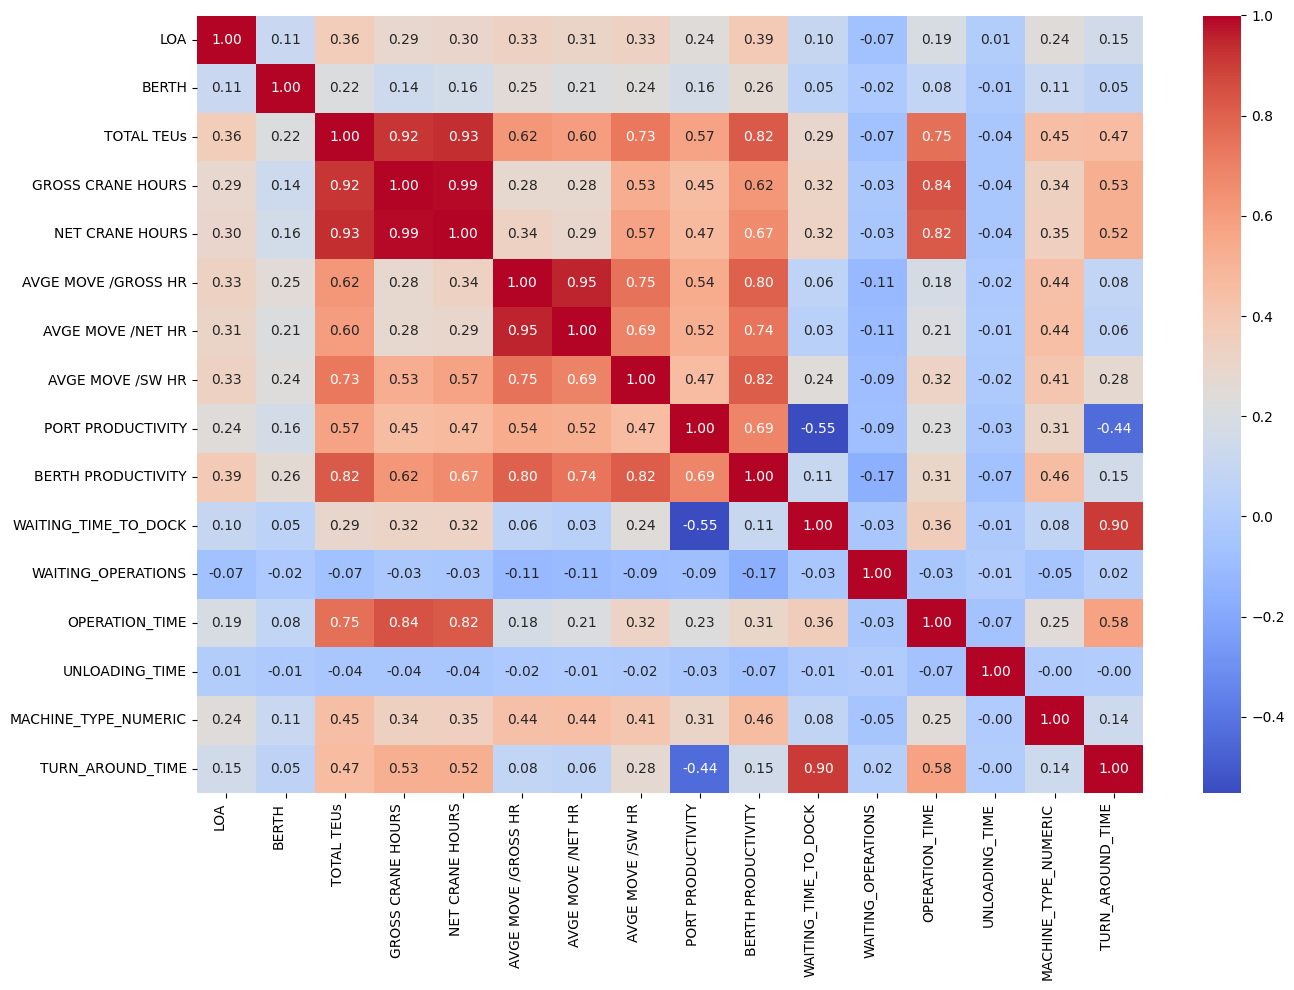

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute correlation matrix for candidate features and the target variable
correlation_matrix = fd[candidate_features + [target]].corr()

# Plot the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)

# Add titles and labels
plt.title("", fontsize=16)
plt.xticks(rotation=90, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


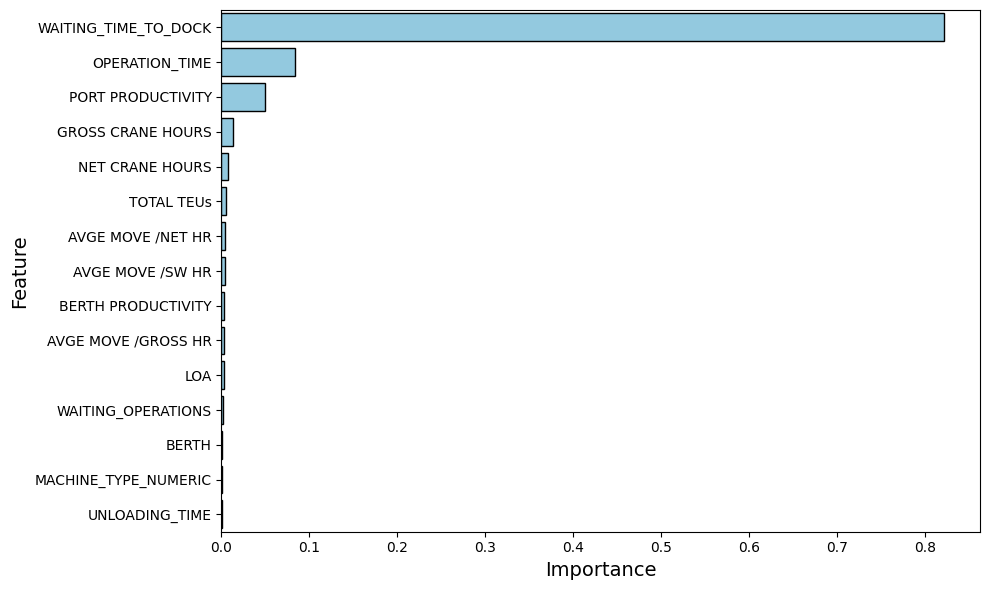

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort features by importance for better visualization
sorted_importances = results_table.sort_values(by='Model Importances', ascending=False)

# Plot histogram of feature importances
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Model Importances',
    y='Feature',
    data=sorted_importances,
    color='skyblue',
    edgecolor='black',
    linewidth=1,
)

# Add titles and labels
plt.title("", fontsize=16)
plt.xlabel("Importance", fontsize=14)
plt.ylabel("Feature", fontsize=14)
plt.tight_layout()
plt.show()


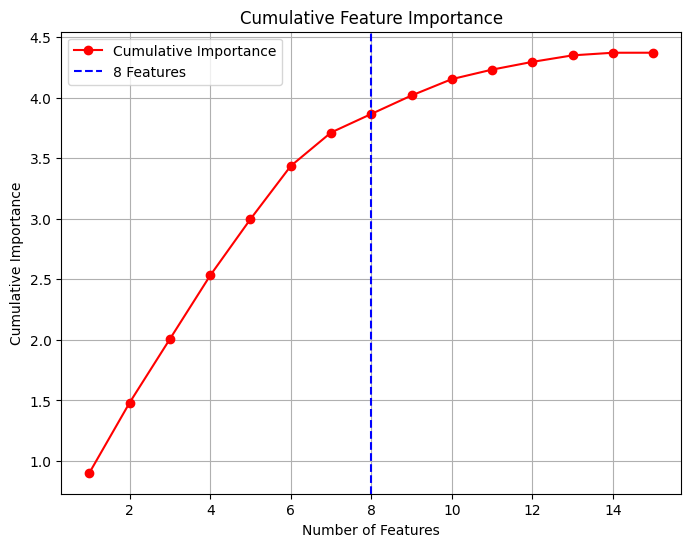

Feature Importance Table:
                 Feature  Correlation  Cumulative Importance
0   WAITING_TIME_TO_DOCK     0.903499               0.903499
1         OPERATION_TIME     0.579722               1.483221
2      GROSS CRANE HOURS     0.525265               2.008486
3        NET CRANE HOURS     0.524080               2.532566
4             TOTAL TEUs     0.465347               2.997913
5      PORT PRODUCTIVITY     0.438158               3.436071
6       AVGE MOVE /SW HR     0.276176               3.712247
7     BERTH PRODUCTIVITY     0.153381               3.865628
8                    LOA     0.152498               4.018126
9   MACHINE_TYPE_NUMERIC     0.135085               4.153211
10   AVGE MOVE /GROSS HR     0.078447               4.231658
11     AVGE MOVE /NET HR     0.063969               4.295627
12                 BERTH     0.053857               4.349484
13    WAITING_OPERATIONS     0.021597               4.371081
14        UNLOADING_TIME     0.000184               4.37126

In [67]:
# Ensure the target column exists in the correlation matrix
if 'TURN_AROUND_TIME' not in correlation_matrix.columns:
  raise ValueError("The correlation matrix must contain a column named 'TURN_AROUND_TIME'.")

# Extract correlations with the target variable, excluding the target itself
correlations_with_target = correlation_matrix['TURN_AROUND_TIME'].drop(labels=['TURN_AROUND_TIME'], errors='ignore')

# Handle cases where the data might be improperly formatted
if correlations_with_target.empty:
    raise ValueError("No features found correlated with the target.")

# Sort correlations by absolute value in descending order
sorted_correlation = correlations_with_target.abs().sort_values(ascending=False)

# Calculate cumulative importance
cumulative_importance = sorted_correlation.cumsum()

# Create a DataFrame to store the results
feature_importance = pd.DataFrame({
    'Feature': sorted_correlation.index,
    'Correlation': sorted_correlation.values,
    'Cumulative Importance': cumulative_importance.values
})

# Plot cumulative importance
plt.figure(figsize=(8, 6))
plt.plot(
    range(1, len(feature_importance) + 1),
    feature_importance['Cumulative Importance'],
    marker='o', color='red', label='Cumulative Importance'
)

# Add vertical line for the threshold (e.g., 90% of cumulative importance)
threshold = 0.9 * cumulative_importance.max()
num_features = (cumulative_importance <= threshold).sum()
plt.axvline(x=num_features, color='blue', linestyle='--', label=f'{num_features} Features')

# Add labels, title, and legend
plt.xlabel('Number of Features')
plt.ylabel('Cumulative Importance')
plt.title('Cumulative Feature Importance')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

# Display the results
print("Feature Importance Table:")
print(feature_importance)


Check Multicollinelity in the Selected Features

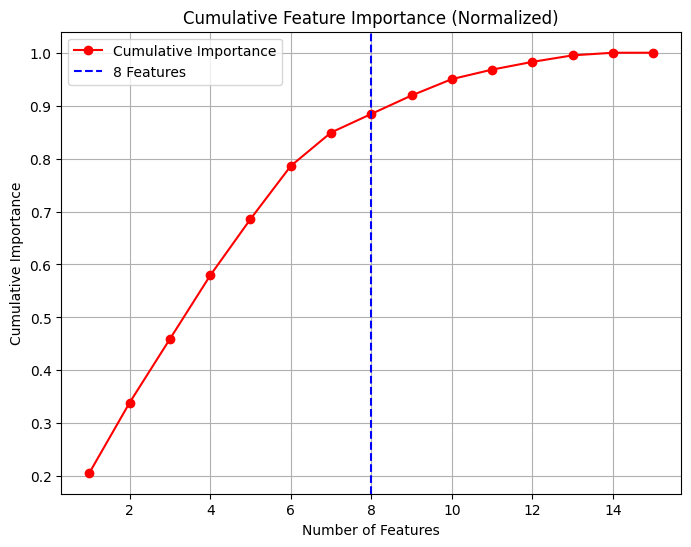

Feature Importance Table:
                 Feature  Normalized Correlation  Cumulative Importance
0   WAITING_TIME_TO_DOCK                0.206691               0.206691
1         OPERATION_TIME                0.132621               0.339312
2      GROSS CRANE HOURS                0.120163               0.459475
3        NET CRANE HOURS                0.119892               0.579367
4             TOTAL TEUs                0.106456               0.685823
5      PORT PRODUCTIVITY                0.100236               0.786059
6       AVGE MOVE /SW HR                0.063180               0.849239
7     BERTH PRODUCTIVITY                0.035088               0.884327
8                    LOA                0.034887               0.919214
9   MACHINE_TYPE_NUMERIC                0.030903               0.950117
10   AVGE MOVE /GROSS HR                0.017946               0.968063
11     AVGE MOVE /NET HR                0.014634               0.982697
12                 BERTH              

In [72]:
# Extract correlations with the target variable, excluding the target itself
correlations_with_target = correlation_matrix['TURN_AROUND_TIME'].drop(labels=['TURN_AROUND_TIME'], errors='ignore')

# Sort correlations by absolute value
sorted_correlation = correlations_with_target.abs().sort_values(ascending=False)

# Normalize correlations to sum to 1
normalized_correlation = sorted_correlation / sorted_correlation.sum()

# Calculate cumulative importance
cumulative_importance = normalized_correlation.cumsum()

# Create a DataFrame for visualization
feature_importance = pd.DataFrame({
    'Feature': normalized_correlation.index,
    'Normalized Correlation': normalized_correlation.values,
    'Cumulative Importance': cumulative_importance.values
})

# Plot cumulative importance
plt.figure(figsize=(8, 6))
plt.plot(
    range(1, len(feature_importance) + 1),
    feature_importance['Cumulative Importance'],
    marker='o', color='red', label='Cumulative Importance'
)

# Add vertical line for threshold (e.g., 90% of cumulative importance)
threshold = 0.9
num_features = (cumulative_importance <= threshold).sum()
plt.axvline(x=num_features, color='blue', linestyle='--', label=f'{num_features} Features')

# Add labels, title, and legend
plt.xlabel('Number of Features')
plt.ylabel('Cumulative Importance')
plt.title('Cumulative Feature Importance (Normalized)')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

# Display the results
print("Feature Importance Table:")
print(feature_importance)


In [74]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# Convert TimeDelta64DType columns to numeric (e.g., seconds)
timedelta_columns = df.select_dtypes(include=['timedelta64[ns]']).columns
for col in timedelta_columns:
    df[col] = df[col].dt.total_seconds()

# Ensure all numeric features for VIF calculation
numeric_features = [
    'LOA','BERTH','TOTAL TEUs','GROSS CRANE HOURS','NET CRANE HOURS',
    'AVGE MOVE /GROSS HR','AVGE MOVE /NET HR','AVGE MOVE /SW HR',
    'PORT PRODUCTIVITY','BERTH PRODUCTIVITY','WAITING_TIME_TO_DOCK',
    'WAITING_OPERATIONS','OPERATION_TIME','UNLOADING_TIME','MACHINE_TYPE_NUMERIC'
]

# Filter numeric features
existing_features = [f for f in numeric_features if f in df.columns]
df_numeric = df[existing_features].select_dtypes(include=[np.number])

# Check for NaN or Inf values and handle them
df_numeric = df_numeric.replace([np.inf, -np.inf], np.nan)  # Replace infinities with NaN
df_numeric = df_numeric.fillna(df_numeric.mean())           # Fill NaN with column mean

# Standardize features for VIF calculation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_numeric)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = df_numeric.columns
vif_data["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]

# Sort VIF values from smallest to largest
sorted_vif = vif_data.sort_values(by='VIF')

# Display sorted VIF values
print(sorted_vif)



                 Feature          VIF
11    WAITING_OPERATIONS     1.072999
1                  BERTH     1.091816
0                    LOA     1.191883
13        UNLOADING_TIME     2.009921
10  WAITING_TIME_TO_DOCK     2.778790
7       AVGE MOVE /SW HR     3.636397
8      PORT PRODUCTIVITY     4.588522
12        OPERATION_TIME     6.829722
9     BERTH PRODUCTIVITY    14.368006
2             TOTAL TEUs    80.575933
6      AVGE MOVE /NET HR  1013.238677
5    AVGE MOVE /GROSS HR  1243.071206
3      GROSS CRANE HOURS  5376.831546
4        NET CRANE HOURS  5560.779330


How to Interpret VIF:

    VIF < 5: Low multicollinearity.
    VIF 5-10: Moderate multicollinearity.
    VIF > 10: High multicollinearity.


optimize features for the development of the model (In order to reduce multicollinearity, enhance predictive power, and maintain interpretability)

In [93]:
# Selected features
optimized_features = ['WAITING_OPERATIONS','BERTH','LOA','UNLOADING_TIME',
                      'PORT PRODUCTIVITY','WAITING_TIME_TO_DOCK',
                      'AVGE MOVE /SW HR','TURN_AROUND_TIME'
]

# Drop redundant features
df_optimized = fd[optimized_features]

# Scale features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_optimized_scaled = scaler.fit_transform(df_optimized)

# Create DataFrame for model development
df_model_ready = pd.DataFrame(df_optimized_scaled, columns=optimized_features)

# Save the dataset for modeling
df_model_ready.to_excel("OPTIMIZED_FEATURES_FOR_MODEL.xlsx", index=False)
print("Optimized dataset saved as 'OPTIMIZED_FEATURES_FOR_MODEL.xlsx'")


Optimized dataset saved as 'OPTIMIZED_FEATURES_FOR_MODEL.xlsx'


In [94]:
# Display the structure and the first few rows of the data
df_optimized.info()

# Display the first few rows to inspect the dataset
df_optimized.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3055 entries, 0 to 3054
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   WAITING_OPERATIONS    3055 non-null   float64
 1   BERTH                 3055 non-null   float64
 2   LOA                   3055 non-null   float64
 3   UNLOADING_TIME        3055 non-null   float64
 4   PORT PRODUCTIVITY     3055 non-null   float64
 5   WAITING_TIME_TO_DOCK  3055 non-null   float64
 6   AVGE MOVE /SW HR      3043 non-null   float64
 7   TURN_AROUND_TIME      3055 non-null   float64
dtypes: float64(8)
memory usage: 191.1 KB


,WAITING_OPERATIONS,BERTH,LOA,UNLOADING_TIME,PORT PRODUCTIVITY,WAITING_TIME_TO_DOCK,AVGE MOVE /SW HR,TURN_AROUND_TIME
0,0.0,9.0,5.351858,0.0,1.256319,2.079442,3.281100,2.197225
1,0.0,10.0,5.351858,0.0,0.557329,1.609438,2.234352,1.791759
2,0.0,11.0,5.351858,0.0,1.532657,2.397895,3.210872,2.639057
3,0.0,9.0,5.351858,0.0,1.399683,2.397895,3.442847,2.484907
4,0.0,11.0,5.351858,0.0,1.393826,2.397895,2.970070,2.639057


MODEL DEVELOPMENT

1: Import Required Libraries

Implementation of ensemble models using Boosting techniques. We will utilize Gradient Boosting, XGBoost, LightGBM, and CatBoost for a regression task

In [95]:
!pip install catboost


In [97]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostRegressor

# Load the dataset
file_path = './OPTIMIZED_FEATURES_FOR_MODEL.xlsx'
df_optimized = pd.read_excel(file_path)

# Define features (X) and target (y)
target = "TURN_AROUND_TIME"  # Replace with your target column
X = df_optimized .drop(columns=[target])
y = df_optimized [target]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a function to evaluate models
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} Performance:")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"R-squared (R²): {r2:.4f}")
    print("-" * 40)
    return {"Model": model_name, "MAE": mae, "RMSE": rmse, "R2": r2}

# Initialize results storage
results = []

# 1. XGBoost
print("Training XGBoost...")
xgbr = xgb.XGBRegressor(random_state=42, verbosity=0)
xgbr.fit(X_train, y_train)
xgbr_pred = xgbr.predict(X_test)
results.append(evaluate_model(y_test, xgbr_pred, "XGBoost"))

# 2. LightGBM
print("Training LightGBM...")
lgbm = lgb.LGBMRegressor(random_state=42)
lgbm.fit(X_train, y_train)
lgbm_pred = lgbm.predict(X_test)
results.append(evaluate_model(y_test, lgbm_pred, "LightGBM"))

# 3. CatBoost
print("Training CatBoost...")
catboost = CatBoostRegressor(verbose=0, random_state=42)
catboost.fit(X_train, y_train)
catboost_pred = catboost.predict(X_test)
results.append(evaluate_model(y_test, catboost_pred, "CatBoost"))

# Compare Results
results_df = pd.DataFrame(results)
print("\nModel Performance Comparison:")
print(results_df)

Training XGBoost...
XGBoost Performance:
Mean Absolute Error (MAE): 0.2425
Root Mean Squared Error (RMSE): 0.4410
R-squared (R²): 0.8090
----------------------------------------
Training LightGBM...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000258 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 624
[LightGBM] [Info] Number of data points in the train set: 2444, number of used features: 6
[LightGBM] [Info] Start training from score -0.010176
LightGBM Performance:
Mean Absolute Error (MAE): 0.2356
Root Mean Squared Error (RMSE): 0.4621
R-squared (R²): 0.7903
----------------------------------------
Training CatBoost...
CatBoost Performance:
Mean Absolute Error (MAE): 0.2228
Root Mean Squared Error (RMSE): 0.3913
R-squared (R²): 0.8496
----------------------------------------

Model Performance Comparison:
      Model

In [98]:
# List to store results
results = []

# 1. XGBoost
print("Tuning and Training XGBoost...")
xgb_params = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 200]
}
xgbr = xgb.XGBRegressor(random_state=42, verbosity=0)
xgb_grid = GridSearchCV(xgbr, xgb_params, cv=3, scoring='neg_mean_squared_error', verbose=0)
xgb_grid.fit(X_train, y_train)
xgbr_best = xgb_grid.best_estimator_
xgbr_pred = xgbr_best.predict(X_test)
results.append(evaluate_model(y_test, xgbr_pred, "XGBoost"))

# 2. LightGBM
print("Tuning and Training LightGBM...")
lgb_params = {
    'learning_rate': [0.01, 0.1, 0.2],
    'num_leaves': [31, 50, 100],
    'n_estimators': [50, 100, 200]
}
lgbm = lgb.LGBMRegressor(random_state=42)
lgb_grid = GridSearchCV(lgbm, lgb_params, cv=3, scoring='neg_mean_squared_error', verbose=0)
lgb_grid.fit(X_train, y_train)
lgbm_best = lgb_grid.best_estimator_
lgbm_pred = lgbm_best.predict(X_test)
results.append(evaluate_model(y_test, lgbm_pred, "LightGBM"))

# 3. CatBoost
print("Tuning and Training CatBoost...")
catboost_params = {
    'learning_rate': [0.01, 0.1, 0.2],
    'depth': [4, 6, 8],
    'iterations': [50, 100, 200]
}
catboost = CatBoostRegressor(verbose=0, random_state=42)
catboost_grid = GridSearchCV(catboost, catboost_params, cv=3, scoring='neg_mean_squared_error', verbose=0)
catboost_grid.fit(X_train, y_train)
catboost_best = catboost_grid.best_estimator_
catboost_pred = catboost_best.predict(X_test)
results.append(evaluate_model(y_test, catboost_pred, "CatBoost"))

# Compare Results
results_df = pd.DataFrame(results)
print("\nModel Performance Comparison:")
print(results_df)

Tuning and Training XGBoost...
XGBoost Performance:
Mean Absolute Error (MAE): 0.2273
Root Mean Squared Error (RMSE): 0.3974
R-squared (R²): 0.8449
----------------------------------------
Tuning and Training LightGBM...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000143 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 608
[LightGBM] [Info] Number of data points in the train set: 1629, number of used features: 5
[LightGBM] [Info] Start training from score -0.013101
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000177 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 604
[LightGBM] [Info] Number of data points in the train set: 1629, number of used featu

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, r2_score
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostRegressor


# Function to evaluate and save results for each iteration
def tune_and_log_model(model, params, model_name, X_train, y_train, X_test, y_test):
    grid_search = GridSearchCV(model, params, cv=3, scoring='neg_mean_absolute_error', verbose=0)
    grid_search.fit(X_train, y_train)

    # Best model and predictions
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = (mean_absolute_error(y_test, y_pred)) ** 0.5  # Optional if you want to keep RMSE
    r2 = r2_score(y_test, y_pred)

    return {
        'Model': model_name,
        'Best Params': grid_search.best_params_,
        'MAE': mae,
        'RMSE': rmse,
        'R²': r2
    }

# Hyperparameter grids
xgb_params = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 200]
}
lgb_params = {
    'learning_rate': [0.01, 0.1, 0.2],
    'num_leaves': [31, 50, 100],
    'n_estimators': [50, 100, 200]
}
catboost_params = {
    'learning_rate': [0.01, 0.1, 0.2],
    'depth': [4, 6, 8],
    'iterations': [50, 100, 200]
}

# Initialize results list
all_results = []

# Iterate 40 times
for iteration in range(1, 41):
    print(f"\n--- Iteration {iteration} ---")

    # Split data into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=iteration)

    # List to store iteration results
    iteration_results = []

    # 1. XGBoost
    iteration_results.append(tune_and_log_model(
        xgb.XGBRegressor(random_state=42, verbosity=0),
        xgb_params,
        "XGBoost",
        X_train,
        y_train,
        X_test,
        y_test
    ))

    # 2. LightGBM
    iteration_results.append(tune_and_log_model(
        lgb.LGBMRegressor(random_state=42),
        lgb_params,
        "LightGBM",
        X_train,
        y_train,
        X_test,
        y_test
    ))

    # 3. CatBoost
    iteration_results.append(tune_and_log_model(
        CatBoostRegressor(verbose=0, random_state=42),
        catboost_params,
        "CatBoost",
        X_train,
        y_train,
        X_test,
        y_test
    ))

    # Add iteration results to the main list
    all_results.extend(iteration_results)

# Convert results to a DataFrame
all_results_df = pd.DataFrame(all_results)

# Save results to a CSV file
all_results_df.to_csv("model_tuning_results_40_iterations_with_mae.csv", index=False)

# Print a summary
print("\nSummary of Results:")
print(all_results_df.groupby('Model')[['MAE', 'RMSE', 'R²']].mean().reset_index())


Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load results from the CSV file or use the DataFrame directly
all_results_df = pd.read_csv("model_tuning_results_40_iterations_with_mae.csv")  # Replace with your DataFrame if already in memory

# Group by model to calculate mean performance
summary_df = all_results_df.groupby('Model')[['MAE', 'RMSE', 'R²']].mean().reset_index()

# Plot performance metrics
plt.figure(figsize=(14, 6))

# 1. Plot MAE
plt.subplot(1, 3, 1)
sns.barplot(data=summary_df, x='Model', y='MAE', palette='viridis')
plt.title('Mean Absolute Error (MAE)')
plt.ylabel('MAE')
plt.xlabel('Model')

# 2. Plot RMSE
plt.subplot(1, 3, 2)
sns.barplot(data=summary_df, x='Model', y='RMSE', palette='magma')
plt.title('Root Mean Squared Error (RMSE)')
plt.ylabel('RMSE')
plt.xlabel('Model')

# 3. Plot R²
plt.subplot(1, 3, 3)
sns.barplot(data=summary_df, x='Model', y='R²', palette='cool')
plt.title('R² Score')
plt.ylabel('R²')
plt.xlabel('Model')

plt.tight_layout()
plt.show()

# Optional: Line plot to track metrics across iterations
plt.figure(figsize=(12, 6))
sns.lineplot(data=all_results_df, x='Iteration', y='MAE', hue='Model', palette='viridis')
plt.title('MAE Across Iterations')
plt.xlabel('Iteration')
plt.ylabel('MAE')
plt.legend(title='Model')
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from catboost import CatBoostRegressor

# Ensure features and target are log-transformed
features = [
    'LOA', 'WAITING_TIME_TO_DOCK', 'WAITING_OPERATIONS', 'OPERATION_TIME',
   'UNLOADING_TIME','PORT PRODUCTIVITY'
]
target = 'TURN_AROUND_TIME'

# Load the dataset and check transformations
assert all([col in df.columns for col in features + [target]]), "Log-transformed columns missing!"

# Split the dataset into training and testing sets
X = df_optimized[features]
y = df_optimized[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the CatBoost model
catboost_model = CatBoostRegressor(
    loss_function="Huber:delta=1.0",
    iterations=500,
    learning_rate=0.05,
    depth=8,
    random_state=42,
    verbose=0
)
catboost_model.fit(X_train, y_train)

# Predict on the test set (log-transformed target)
y_pred = catboost_model.predict(X_test)

# Convert predictions and actual values back to the original scale
y_pred_original = np.expm1(y_pred)
y_test_original = np.expm1(y_test)

# Evaluate the model on the original scale
mae = mean_absolute_error(y_test_original, y_pred_original)
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
r2 = r2_score(y_test_original, y_pred_original)

# Display evaluation metrics
print("CatBoost Model Performance with Log-Transformed Features and Target:")
print(f"Mean Absolute Error (MAE): {mae:.6f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.6f}")
print(f"R-squared (R²): {r2:.6f}")

# Save predictions alongside actual values
predictions_df = pd.DataFrame({
    "Actual TURN AROUND TIME": y_test_original,
    "Predicted TURN AROUND TIME": y_pred_original
}).reset_index(drop=True)

# Save to a CSV file
predictions_df.to_csv("./turnaround_time_predictions.csv", index=False)

# Display the predictions DataFrame
print(predictions_df.head(10))


CatBoost Model Performance with Log-Transformed Features and Target:
Mean Absolute Error (MAE): 1.580246
Root Mean Squared Error (RMSE): 15.240623
R-squared (R²): 0.087703
   Actual TURN AROUND TIME  Predicted TURN AROUND TIME
0                      3.0                    2.603289
1                     15.0                   14.167735
2                      7.0                    7.597863
3                      5.0                    6.571511
4                      2.0                    1.297167
5                      1.0                    1.481342
6                      2.0                    2.297870
7                      1.0                    0.710573
8                      3.0                    2.591312
9                      5.0                    5.633611


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from catboost import CatBoostRegressor

# Ensure dataset contains log-transformed features and target
features = [
    'LOA', 'WAITING_TIME_TO_DOCK', 'WAITING_OPERATIONS', 'OPERATION_TIME',
   'UNLOADING_TIME','PORT PRODUCTIVITY'
]
target = 'TURN_AROUND_TIME'

# Confirm features and target are log-transformed
assert all([col in df.columns for col in features + [target]]), "Log-transformed columns missing!"

# Handle missing data (if any)
df_cleaned = df_optimized[features + [target]].dropna()

# Split data into training and testing sets
X = df_cleaned[features]
y = df_cleaned[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the CatBoost model
catboost_model = CatBoostRegressor(
    loss_function="Huber:delta=1.0",
    iterations=500,
    learning_rate=0.05,
    depth=8,
    random_state=42,
    verbose=0
)
catboost_model.fit(X_train, y_train)

# Predict on the test set (log-transformed target)
y_pred_log = catboost_model.predict(X_test)

# Convert predictions and actuals back to the original scale
y_pred_original = np.expm1(y_pred_log)
y_test_original = np.expm1(y_test)

# Save predictions and actuals
predictions_df = pd.DataFrame({
    "Actual Turnaround Time (Days)": y_test_original,
    "Predicted Turnaround Time (Days)": y_pred_original
}).reset_index(drop=True)

predictions_df.to_excel("./turnaround_time_predictions.xlsx", index=False)
print(predictions_df.head())


   Actual Turnaround Time (Days)  Predicted Turnaround Time (Days)
0                            3.0                          2.603289
1                           15.0                         14.167735
2                            7.0                          7.597863
3                            5.0                          6.571511
4                            2.0                          1.297167


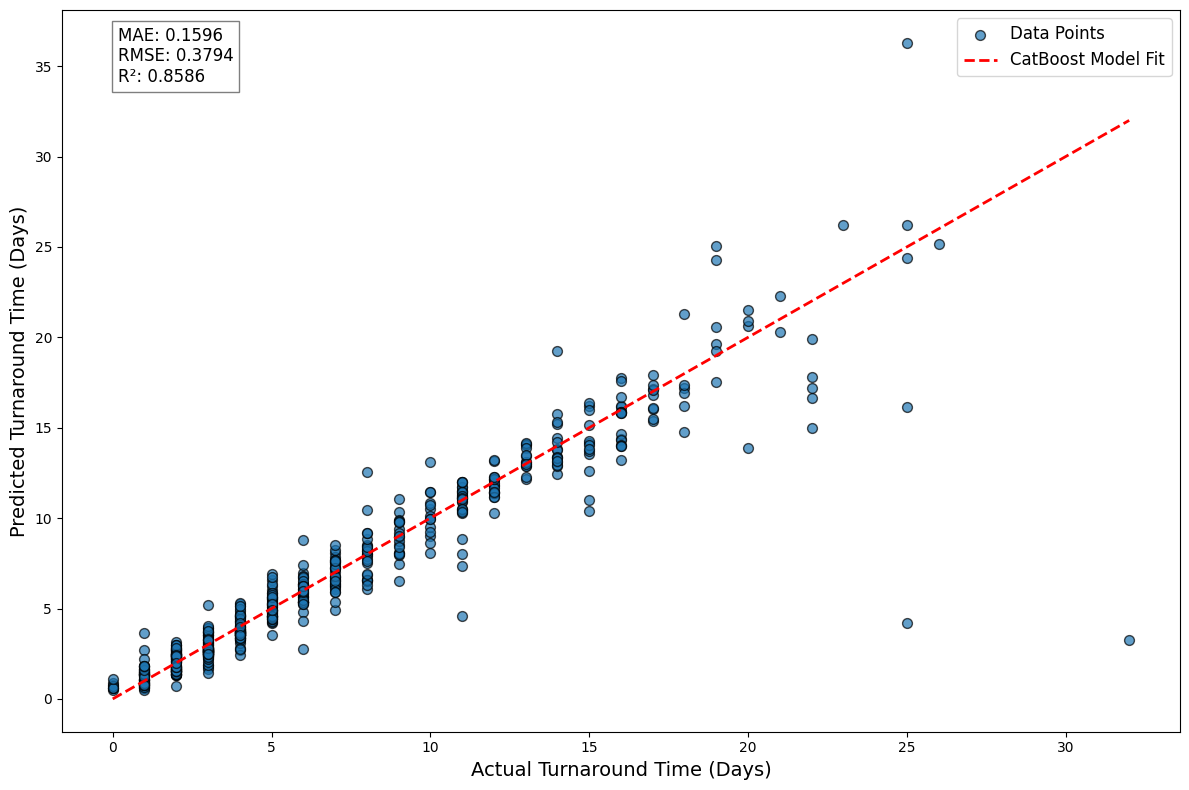

In [ ]:
import matplotlib.pyplot as plt

# Plot actual vs predicted TURN AROUND TIME for range [0, 50] with scaled figure and metrics
plt.figure(figsize=(12, 8))  # Scaled figure size

# Filter data for the range 0 to 50
mask = (y_test_original >= 0) & (y_test_original <= 50)
filtered_actual = y_test_original[mask]
filtered_predicted = y_pred_original[mask]

plt.scatter(filtered_actual, filtered_predicted, alpha=0.7, edgecolor='k', label='Data Points', s=50)  # Increase marker size
plt.plot([filtered_actual.min(), filtered_actual.max()],
         [filtered_actual.min(), filtered_actual.max()],
         color='red', linestyle='--', linewidth=2, label='CatBoost Model Fit')

# Add specified performance metrics as text on the plot
plt.text(0.05, 0.9,
         "MAE: 0.1596\n"
         "RMSE: 0.3794\n"
         "R²: 0.8586",
         transform=plt.gca().transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

# Add title, labels, and legend
plt.title("", fontsize=16)
plt.xlabel("Actual Turnaround Time (Days)", fontsize=14)
plt.ylabel("Predicted Turnaround Time (Days)", fontsize=14)
plt.legend(fontsize=12)
plt.grid(False)
plt.tight_layout()
plt.show()
